In [5]:
import pylab as plt
import pandas as pd
import numpy as np

In [6]:
results_df = pd.read_csv('../raw/LOCAL_lenet_mnist_tests.csv')
results_df.columns = results_df.columns.str.strip()

In [7]:
print(results_df)

               name              parameters  neurons weight_train  seed  \
0      lenet-ae-elm             h_size:250;      250         True    22   
1      lenet-ae-elm             h_size:250;      250        False    22   
2      lenet-ae-elm             h_size:250;      250         True   432   
3      lenet-ae-elm             h_size:250;      250        False   432   
4      lenet-ae-elm             h_size:250;      250         True    63   
..              ...                     ...      ...          ...   ...   
841  lenet-pae-rvfl  h_size:1200;subnets:6;     1200        False    22   
842  lenet-pae-rvfl  h_size:1200;subnets:6;     1200         True   432   
843  lenet-pae-rvfl  h_size:1200;subnets:6;     1200        False   432   
844  lenet-pae-rvfl  h_size:1200;subnets:6;     1200         True    63   
845  lenet-pae-rvfl  h_size:1200;subnets:6;     1200        False    63   

        acc  train_time  test_time  
0    0.9342   29.736599   0.291504  
1    0.9209    2.466301  

## LeNet AE-ELM

In [8]:
ae_elm_df = results_df[results_df['name']=='lenet-ae-elm']

ae_elm_proc_df = ae_elm_df.drop(columns=['seed']).groupby(['neurons', 'weight_train']).agg([np.mean,np.std])
ae_elm_wt_df = ae_elm_df[ae_elm_df['weight_train']==' True'].drop(columns=['seed', 'weight_train']).groupby(['neurons']).agg([np.mean,np.std])
ae_elm_nowt_df = ae_elm_df[ae_elm_df['weight_train']==' False'].drop(columns=['seed', 'weight_train']).groupby(['neurons']).agg([np.mean,np.std])

# ae_elm_proc_df.to_csv('../processed/lenet-ae-elm-results.csv')

print(ae_elm_wt_df)
print(ae_elm_nowt_df)

             acc           train_time           test_time          
            mean       std       mean       std      mean       std
neurons                                                            
250      0.93507  0.003598  29.387098  0.361380  0.304546  0.029503
500      0.95484  0.002710  29.898760  0.639193  0.319420  0.025415
1000     0.96715  0.002054  33.108989  0.846258  0.334006  0.006516
2000     0.97254  0.003966  41.038793  0.248849  0.389592  0.006063
4000     0.63080  0.315132  66.855663  0.816755  0.483960  0.009196
             acc           train_time           test_time          
            mean       std       mean       std      mean       std
neurons                                                            
250      0.93052  0.005494   2.466676  0.026838  0.303307  0.008306
500      0.94767  0.007587   3.307362  0.178187  0.318487  0.006418
1000     0.96197  0.004362   6.041967  0.117107  0.343144  0.005046
2000     0.97158  0.002909  13.839961  0.088605 

/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_77733/1756402984.py:3: FutureWarning: ['name', 'parameters'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ae_elm_proc_df = ae_elm_df.drop(columns=['seed']).groupby(['neurons', 'weight_train']).agg([np.mean,np.std])
/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_77733/1756402984.py:4: FutureWarning: ['name', 'parameters'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ae_elm_wt_df = ae_elm_df[ae_elm_df['weight_train']==' True'].drop(columns=['seed', 'weight_train']).groupby(['neurons']).agg([np.mean,np.std])
/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_77733/1756402984.py:5: FutureWarning: ['name', 'parameters'] did not aggregate successfully. If any error is raised this will raise in a future versi

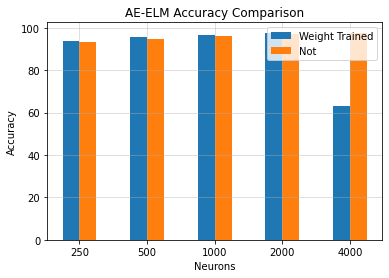

In [140]:
ae_elm_wt_acc_mean = np.array(ae_elm_wt_df['acc']['mean'])*100
ae_elm_wt_acc_std = np.array(ae_elm_wt_df['acc']['std'])*100
ae_elm_wt_tt_mean = np.array(ae_elm_wt_df['train_time']['mean'])
ae_elm_wt_tt_std = np.array(ae_elm_wt_df['train_time']['std'])
ae_elm_nowt_acc_mean = np.array(ae_elm_nowt_df['acc']['mean'])*100
ae_elm_nowt_acc_std = np.array(ae_elm_nowt_df['acc']['std'])*100
ae_elm_nowt_tt_mean = np.array(ae_elm_nowt_df['train_time']['mean'])
ae_elm_nowt_tt_std = np.array(ae_elm_nowt_df['train_time']['std'])
space = np.arange(5)
labels = [250,500,1000,2000,4000]


plt.title('AE-ELM Accuracy Comparison')
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.grid(which='both', alpha=0.5)
plt.bar(space, ae_elm_wt_acc_mean, width=0.25)
plt.bar(space+0.25, ae_elm_nowt_acc_mean, width=0.25)
plt.xticks(space+0.125, labels)
plt.legend(['Weight Trained', 'Not'])

## LeNet ELM

In [35]:
elm_df = results_df[results_df['name']=='lenet-elm']

elm_proc_df = elm_df.drop(columns=['seed']).groupby(['neurons', 'weight_train']).agg([np.mean,np.std])
elm_wt_df = elm_df[elm_df['weight_train']==' True'].drop(columns=['seed', 'weight_train']).groupby(['neurons']).agg([np.mean,np.std])
elm_nowt_df = elm_df[elm_df['weight_train']==' False'].drop(columns=['seed', 'weight_train']).groupby(['neurons']).agg([np.mean,np.std])

# elm_proc_df.to_csv('../processed/lenet-elm-results.csv')

print(elm_proc_df)

                          acc            train_time           test_time  \
                         mean       std        mean       std      mean   
neurons weight_train                                                      
250      False        0.88445  0.007159    6.934454  0.152749  0.293416   
         True         0.87320  0.009790   33.200530  0.407439  0.297469   
500      False        0.92060  0.008100   12.118251  0.027202  0.307155   
         True         0.90727  0.004787   38.264721  0.252884  0.300713   
1000     False        0.94288  0.003567   22.812428  0.144719  0.328107   
         True         0.93008  0.005049   49.084462  0.234346  0.322667   
2000     False        0.95805  0.001945   44.972939  0.068600  0.372708   
         True         0.94617  0.003011   71.293840  0.358365  0.361780   
4000     False        0.96627  0.002088   91.391371  0.349775  0.455377   
         True         0.95611  0.002837  117.579491  0.444783  0.465675   

                        

/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_77733/2206604747.py:3: FutureWarning: ['name', 'parameters'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  elm_proc_df = elm_df.drop(columns=['seed']).groupby(['neurons', 'weight_train']).agg([np.mean,np.std])
/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_77733/2206604747.py:4: FutureWarning: ['name', 'parameters'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  elm_wt_df = elm_df[elm_df['weight_train']==' True'].drop(columns=['seed', 'weight_train']).groupby(['neurons']).agg([np.mean,np.std])
/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_77733/2206604747.py:5: FutureWarning: ['name', 'parameters'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. D

In [141]:
elm_wt_acc_mean = np.array(elm_wt_df['acc']['mean'])*100
elm_wt_acc_std = np.array(elm_wt_df['acc']['std'])*100
elm_wt_tt_mean = np.array(elm_wt_df['train_time']['mean'])
elm_wt_tt_std = np.array(elm_wt_df['train_time']['std'])
elm_nowt_acc_mean = np.array(elm_nowt_df['acc']['mean'])*100
elm_nowt_acc_std = np.array(elm_nowt_df['acc']['std'])*100
elm_nowt_tt_mean = np.array(elm_nowt_df['train_time']['mean'])
elm_nowt_tt_std = np.array(elm_nowt_df['train_time']['std'])

## LeNet PAE-RVFL

In [116]:
pae_rvfl_df = results_df[results_df['name']=='lenet-pae-rvfl']

pae_rvfl_proc_df = pae_rvfl_df[pae_rvfl_df['neurons']==600]#.drop(columns=['seed', 'neurons']).groupby(['parameters', 'weight_train']).agg([np.mean,np.std])

pae_rvfl_wt_df = pae_rvfl_proc_df[pae_rvfl_proc_df['weight_train']==' True' ].drop(columns=['seed', 'weight_train']).groupby(['parameters']).agg([np.mean,np.std])
pae_rvfl_nowt_df = pae_rvfl_proc_df[pae_rvfl_proc_df['weight_train']==' False'].drop(columns=['seed', 'weight_train']).groupby(['parameters']).agg([np.mean,np.std])

pae_rvfl_wt_df = pae_rvfl_wt_df.reindex([
    'h_size:600;subnets:1;',
    'h_size:600;subnets:2;',
    'h_size:600;subnets:3;',
    'h_size:600;subnets:4;',
    'h_size:600;subnets:6;',
    'h_size:600;subnets:8;',
    'h_size:600;subnets:10;',
])

pae_rvfl_nowt_df = pae_rvfl_nowt_df.reindex([
    'h_size:600;subnets:1;',
    'h_size:600;subnets:2;',
    'h_size:600;subnets:3;',
    'h_size:600;subnets:4;',
    'h_size:600;subnets:6;',
    'h_size:600;subnets:8;',
    'h_size:600;subnets:10;',
])

print(pae_rvfl_wt_df)
# pae_rvfl_proc_df.to_csv('../processed/lenet-pae-rvfl-600-results.csv')



                       neurons           acc           train_time            \
                          mean  std     mean       std       mean       std   
parameters                                                                    
h_size:600;subnets:1;    600.0  0.0  0.96290  0.001799  33.166553  0.499926   
h_size:600;subnets:2;    600.0  0.0  0.92311  0.102881  38.420304  0.397974   
h_size:600;subnets:3;    600.0  0.0  0.96820  0.004872  43.137117  0.557180   
h_size:600;subnets:4;    600.0  0.0  0.81636  0.272600  48.341616  1.036485   
h_size:600;subnets:6;    600.0  0.0  0.63546  0.430472  61.698165  1.312553   
h_size:600;subnets:8;    600.0  0.0  0.66485  0.285561  73.161485  1.663285   
h_size:600;subnets:10;   600.0  0.0  0.61703  0.299957  84.869089  1.153652   

                       test_time            
                            mean       std  
parameters                                  
h_size:600;subnets:1;   0.357687  0.035476  
h_size:600;subnets:2;   0.426

/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_77733/3231007902.py:5: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pae_rvfl_wt_df = pae_rvfl_proc_df[pae_rvfl_proc_df['weight_train']==' True' ].drop(columns=['seed', 'weight_train']).groupby(['parameters']).agg([np.mean,np.std])
/var/folders/mr/vnkbxhh151s11m2mmshdgq080000gn/T/ipykernel_77733/3231007902.py:6: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pae_rvfl_nowt_df = pae_rvfl_proc_df[pae_rvfl_proc_df['weight_train']==' False'].drop(columns=['seed', 'weight_train']).groupby(['parameters']).agg([np.mean,np.std])


In [138]:
pae_rvfl_wt_acc_mean = np.array(pae_rvfl_wt_df['acc']['mean'])*100
pae_rvfl_wt_acc_std = np.array(pae_rvfl_wt_df['acc']['std'])*100
pae_rvfl_wt_tt_mean = np.array(pae_rvfl_wt_df['train_time']['mean'])
pae_rvfl_wt_tt_std = np.array(pae_rvfl_wt_df['train_time']['std'])
pae_rvfl_nowt_acc_mean = np.array(pae_rvfl_nowt_df['acc']['mean'])*100
pae_rvfl_nowt_acc_std = np.array(pae_rvfl_nowt_df['acc']['std'])*100
pae_rvfl_nowt_tt_mean = np.array(pae_rvfl_nowt_df['train_time']['mean'])
pae_rvfl_nowt_tt_std = np.array(pae_rvfl_nowt_df['train_time']['std'])

## Plot Network Size against Accuracy

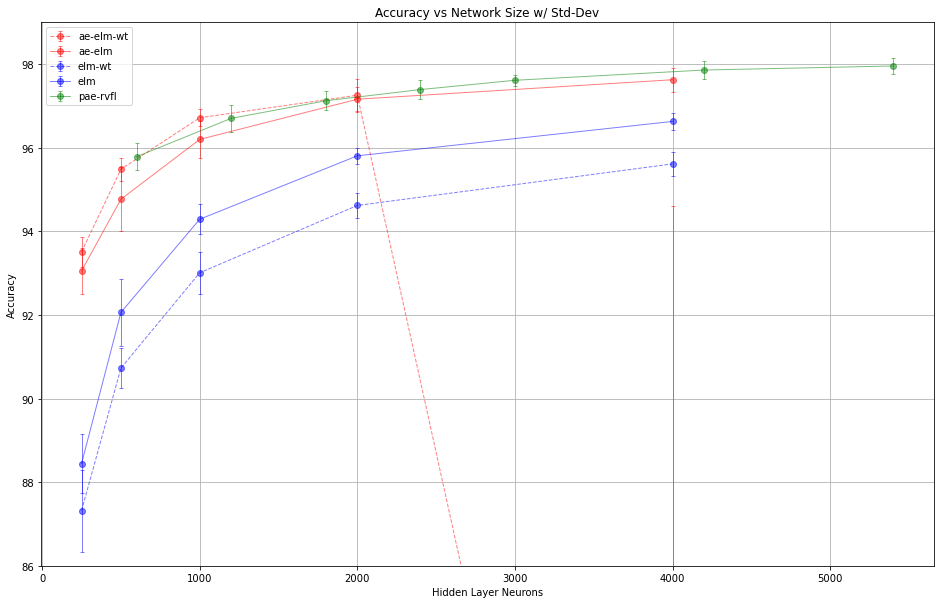

In [142]:

plt.figure(figsize=(16, 10))
plt.title('Accuracy vs Network Size w/ Std-Dev')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Accuracy')
labels_pae = [600, 1200, 1800, 2400, 3000, 4200, 5400]
plt.errorbar(labels, ae_elm_wt_acc_mean, yerr=ae_elm_wt_acc_std, fmt='o--', color='red', alpha=0.5, linewidth=1, capsize=2)
plt.errorbar(labels, ae_elm_nowt_acc_mean, yerr=ae_elm_nowt_acc_std, fmt='o-', color='red', alpha=0.5, linewidth=1, capsize=2)
plt.errorbar(labels, elm_wt_acc_mean, yerr=elm_wt_acc_std, fmt='o--', color='blue', alpha=0.5, linewidth=1, capsize=2)
plt.errorbar(labels, elm_nowt_acc_mean, yerr=elm_nowt_acc_std, fmt='o-', color='blue', alpha=0.5, linewidth=1, capsize=2)
# plt.errorbar(labels_pae, pae_rvfl_wt_acc_mean, yerr=pae_rvfl_wt_acc_std, fmt='o--', color='green', alpha=0.5, linewidth=1)
plt.errorbar(labels_pae, pae_rvfl_nowt_acc_mean, yerr=pae_rvfl_nowt_acc_std, fmt='o-', color='green', alpha=0.5, linewidth=1, capsize=2)
plt.grid(which='both')
plt.ylim(86,99)
plt.legend(['ae-elm-wt','ae-elm','elm-wt','elm','pae-rvfl','pae-rvfl'])

[29.38709834 29.8987596  33.10898902 41.03879297 66.85566308]


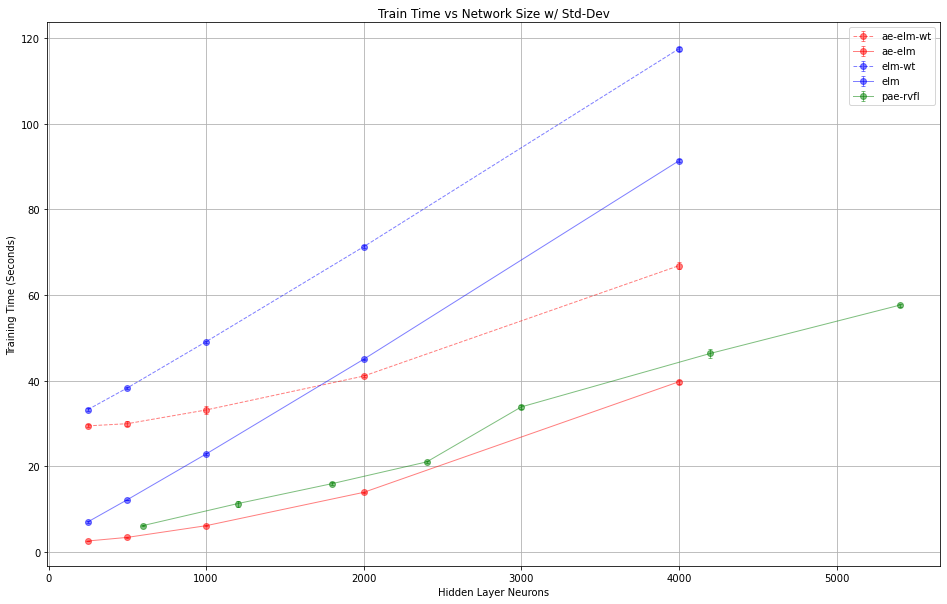

In [145]:
plt.figure(figsize=(16, 10))
plt.title('Train Time vs Network Size w/ Std-Dev')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Training Time (Seconds)')
labels_pae = [600, 1200, 1800, 2400, 3000, 4200, 5400]
print(ae_elm_wt_tt_mean)
plt.errorbar(labels, ae_elm_wt_tt_mean, yerr=ae_elm_wt_tt_std, fmt='o--', color='red', alpha=0.5, linewidth=1, capsize=2)
plt.errorbar(labels, ae_elm_nowt_tt_mean, yerr=ae_elm_nowt_tt_std, fmt='o-', color='red', alpha=0.5, linewidth=1, capsize=2)
plt.errorbar(labels, elm_wt_tt_mean, yerr=elm_wt_tt_std, fmt='o--', color='blue', alpha=0.5, linewidth=1, capsize=2)
plt.errorbar(labels, elm_nowt_tt_mean, yerr=elm_nowt_tt_std, fmt='o-', color='blue', alpha=0.5, linewidth=1, capsize=2)
# plt.errorbar(labels_pae, pae_rvfl_wt_acc_mean, yerr=pae_rvfl_wt_acc_std, fmt='o--', color='green', alpha=0.5, linewidth=1)
plt.errorbar(labels_pae, pae_rvfl_nowt_tt_mean, yerr=pae_rvfl_nowt_tt_std, fmt='o-', color='green', alpha=0.5, linewidth=1, capsize=2)
plt.grid(which='both')
plt.legend(['ae-elm-wt','ae-elm','elm-wt','elm','pae-rvfl','pae-rvfl'])
# plt.ylim(86,99)